In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr


# For time stamps
from datetime import datetime


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Measles/nigeria.csv', parse_dates= True , index_col= "Year-Month")

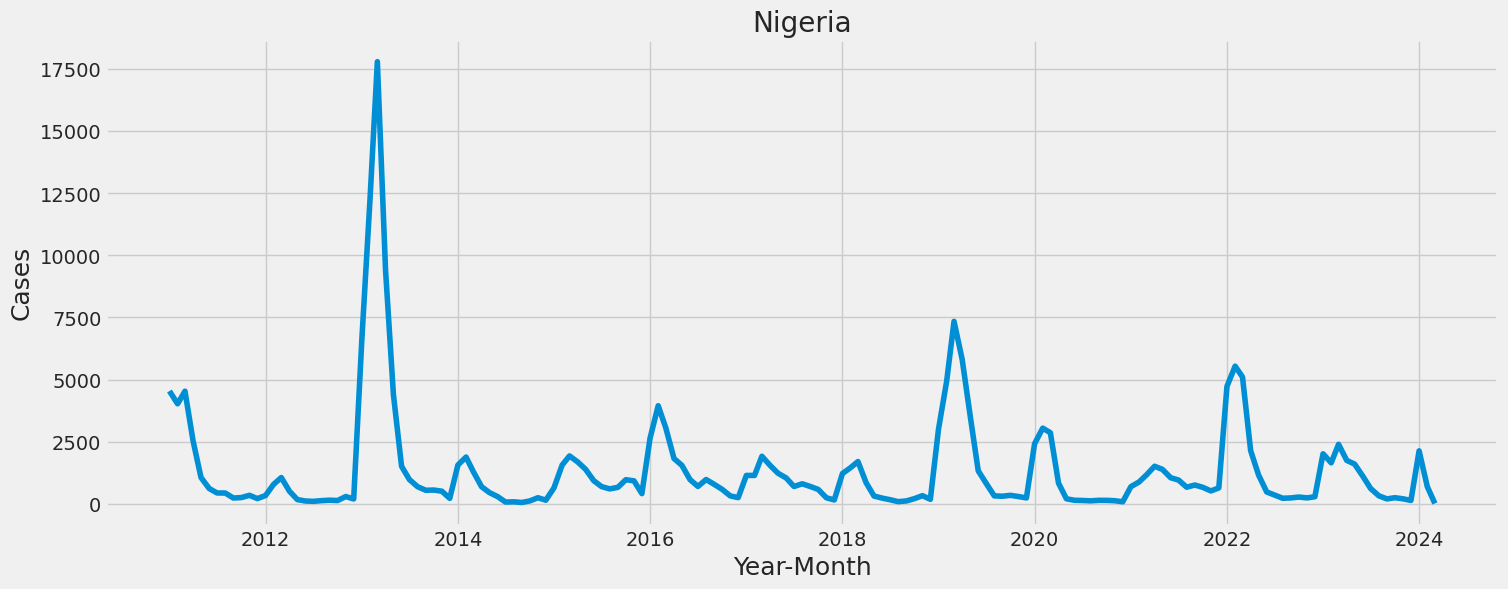

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Nigeria')
plt.plot(df['Cases'])
plt.xlabel('Year-Month', fontsize=18)
plt.ylabel('Cases', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Cases'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .92 ))

training_data_len

147

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.25454034],
       [0.22563958],
       [0.25420298],
       [0.14101771],
       [0.05875738],
       [0.03390498],
       [0.02378409],
       [0.02372786],
       [0.01236997],
       [0.01338206],
       [0.01849873],
       [0.01107675],
       [0.01793646],
       [0.04351982],
       [0.05870115],
       [0.02777622],
       [0.00882766],
       [0.00556649],
       [0.00489176],
       [0.00646612],
       [0.00747821],
       [0.00669103],
       [0.0157436 ],
       [0.01028957],
       [0.37087433],
       [0.68788305],
       [1.        ],
       [0.52876019],
       [0.24633118],
       [0.0840596 ],
       [0.05397807],
       [0.03795333],
       [0.02985662],
       [0.03041889],
       [0.02783244],
       [0.01163902],
       [0.08703964],
       [0.10508856],
       [0.07157717],
       [0.03795333],
       [0.02468372],
       [0.0155187 ],
       [0.00320495],
       [0.00376722],
       [0.00230531],
       [0.0057914 ],
       [0.0130447 ],
       [0.007

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.25454034, 0.22563958, 0.25420298, 0.14101771, 0.05875738,
       0.03390498, 0.02378409, 0.02372786, 0.01236997, 0.01338206,
       0.01849873, 0.01107675, 0.01793646, 0.04351982, 0.05870115,
       0.02777622, 0.00882766, 0.00556649, 0.00489176, 0.00646612,
       0.00747821, 0.00669103, 0.0157436 , 0.01028957, 0.37087433,
       0.68788305, 1.        , 0.52876019, 0.24633118, 0.0840596 ])]
[0.0539780714084903]

[array([0.25454034, 0.22563958, 0.25420298, 0.14101771, 0.05875738,
       0.03390498, 0.02378409, 0.02372786, 0.01236997, 0.01338206,
       0.01849873, 0.01107675, 0.01793646, 0.04351982, 0.05870115,
       0.02777622, 0.00882766, 0.00556649, 0.00489176, 0.00646612,
       0.00747821, 0.00669103, 0.0157436 , 0.01028957, 0.37087433,
       0.68788305, 1.        , 0.52876019, 0.24633118, 0.0840596 ]), array([0.22563958, 0.25420298, 0.14101771, 0.05875738, 0.03390498,
       0.02378409, 0.02372786, 0.01236997, 0.01338206, 0.01849873,
       0.01107675, 0.01793646, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=False, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0))  # Adding dropout to prevent overfitting
model.add(Dense(25,activation='relu'))
model.add(Dense(1))
adam = Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=450, validation_split=0.2)
#model.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/450
1/1 [==============================] - 3s 3s/step - loss: 0.0100 - val_loss: 0.0128
Epoch 2/450
1/1 [==============================] - 0s 114ms/step - loss: 0.0076 - val_loss: 0.0109
Epoch 3/450
1/1 [==============================] - 0s 103ms/step - loss: 0.0064 - val_loss: 0.0095
Epoch 4/450
1/1 [==============================] - 0s 103ms/step - loss: 0.0056 - val_loss: 0.0085
Epoch 5/450
1/1 [==============================] - 0s 100ms/step - loss: 0.0052 - val_loss: 0.0079
Epoch 6/450
1/1 [==============================] - 0s 96ms/step - loss: 0.0053 - val_loss: 0.0076
Epoch 7/450
1/1 [==============================] - 0s 99ms/step - loss: 0.0054 - val_loss: 0.0076
Epoch 8/450
1/1 [==============================] - 0s 98ms/step - loss: 0.0053 - val_loss: 0.0076
Epoch 9/450
1/1 [==============================] - 0s 102ms/step - loss: 0.0051 - val_loss: 0.0078
Epoch 10/450
1/1 [==============================] - 0s 116ms/step - loss: 0.0049 - val_loss: 0.0080
Epoch 11/450
1/

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 686ms/step


789.1692229784668

<ipython-input-205-68f772207810>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


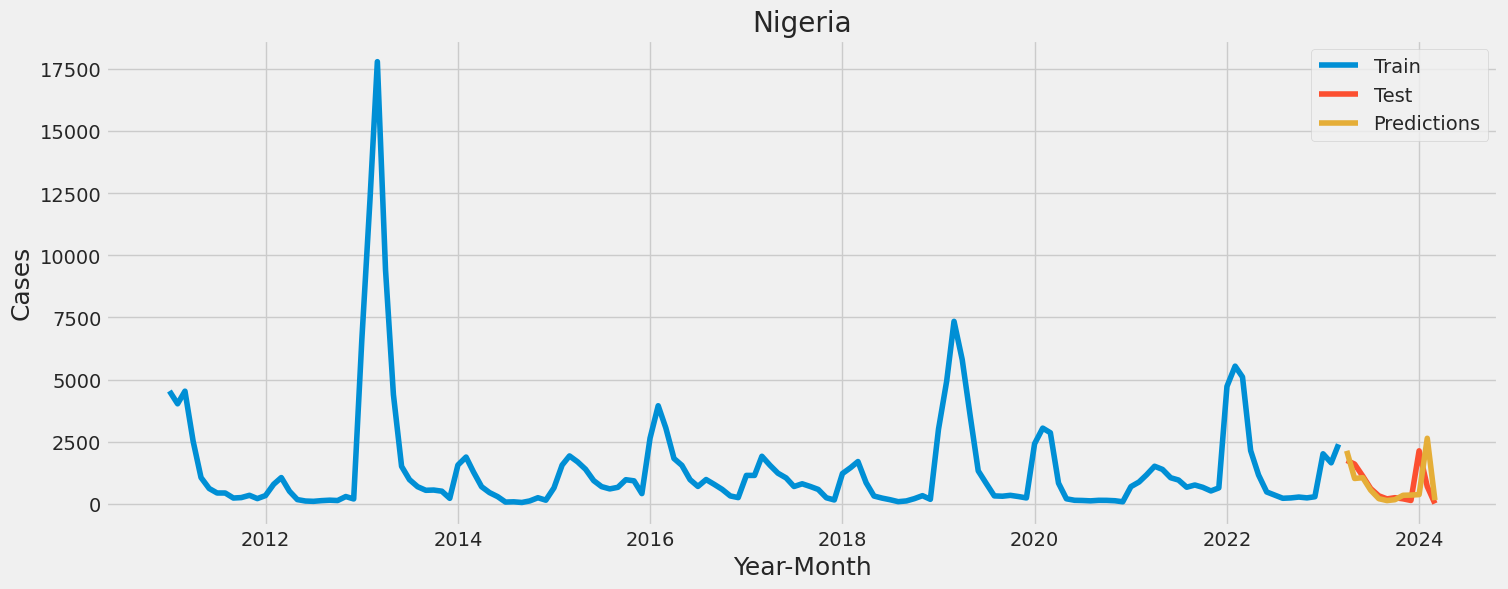

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Nigeria')
plt.xlabel('Year-Month', fontsize=18)
plt.ylabel('Cases', fontsize=18)
plt.plot(train['Cases'])
plt.plot(valid[['Cases', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='upper right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Cases,Predictions
Year-Month,,
2023-04-01,1747,2132.971924
2023-05-01,1598,1019.622559
2023-06-01,1113,1051.810181
2023-07-01,613,548.729431
2023-08-01,321,205.784775
2023-09-01,196,129.119232
2023-10-01,245,165.015533
2023-11-01,200,341.574951
2023-12-01,134,351.283478


In [ ]:
predictions

array([[2132.972  ],
       [1019.62256],
       [1051.8102 ],
       [ 548.72943],
       [ 205.78477],
       [ 129.11923],
       [ 165.01553],
       [ 341.57495],
       [ 351.28348],
       [ 370.0284 ],
       [2637.1797 ],
       [ 146.02957]], dtype=float32)

In [ ]:
valid["Cases"]

Year-Month
2023-04-01    1747
2023-05-01    1598
2023-06-01    1113
2023-07-01     613
2023-08-01     321
2023-09-01     196
2023-10-01     245
2023-11-01     200
2023-12-01     134
2024-01-01    2132
2024-02-01     696
2024-03-01      12
Name: Cases, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(valid["Cases"],predictions))
print('Test RMSE: %.4f' % error)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(valid["Cases"],predictions)
print("Mean Absolute Error (MAE):", mae)

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(valid["Cases"],predictions)
print("Mean Squared Logarithmic Error (MSLE):", msle)

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE):',mean_absolute_percentage_error(valid["Cases"],predictions))

Test RMSE: 789.1692
Mean Absolute Error (MAE): 462.3274574279785
Mean Squared Logarithmic Error (MSLE): 1.0582130922183193
Mean Absolute Percentage Error (MAPE): 1.5736111270582633


In [ ]:
valid["Cases"]

Year-Month
2023-04-01    1747
2023-05-01    1598
2023-06-01    1113
2023-07-01     613
2023-08-01     321
2023-09-01     196
2023-10-01     245
2023-11-01     200
2023-12-01     134
2024-01-01    2132
2024-02-01     696
2024-03-01      12
Name: Cases, dtype: int64

In [ ]:
predictions

array([[2132.972  ],
       [1019.62256],
       [1051.8102 ],
       [ 548.72943],
       [ 205.78477],
       [ 129.11923],
       [ 165.01553],
       [ 341.57495],
       [ 351.28348],
       [ 370.0284 ],
       [2637.1797 ],
       [ 146.02957]], dtype=float32)

1/1 [==============================] - 0s 48ms/step


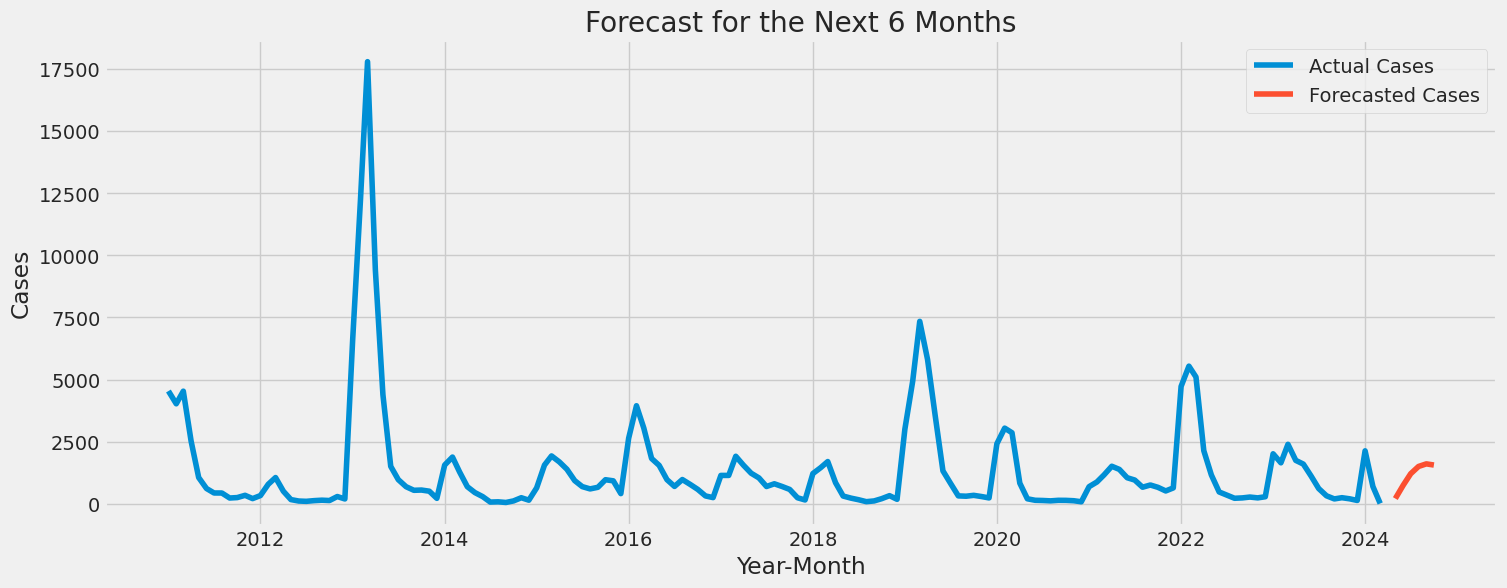

In [ ]:
# Get the last 30 data points from the original data to predict the next 6 months
last_30_days = scaled_data[-151:]
# Create an empty list to store the forecasted values
forecast = []

# Predict the next value, add it to the forecast list, then use this new value to predict the next one
for i in range(6):
    x_input = last_30_days.reshape((1, 151, 1))
    forecasted_value = model.predict(x_input)
    forecast.append(forecasted_value[0][0])
    last_30_days = np.append(last_30_days[1:], forecasted_value[0][0])
    last_30_days = last_30_days.reshape((151, 1))

# Inverse transform the forecasted values to bring them back to the original scale
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create date range for the next 6 months
current_date = df.index[-1]
date_range = pd.date_range(start=current_date, periods=7, freq='M')[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=date_range, columns=['Forecast'])

# Plot the original data along with the forecast
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Cases'], label='Actual Cases')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Cases', linestyle='-')
plt.title('Forecast for the Next 6 Months')
plt.xlabel('Year-Month')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [ ]:
#from keras.models import load_model


#model.save('/content/drive/MyDrive/Colab Notebooks/Measles/nijerya_lstm_model-450-1.h5')


#loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Measles/nijerya_lstm_model.h5')


#predictions_loaded_model = loaded_model.predict(x_test)
#predictions_loaded_model = scaler.inverse_transform(predictions_loaded_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
forecast_df = forecast_df.rename(columns = {'Forecast':'Cases'})
forecast_df.head()

,Cases
2024-04-30,210.639694
2024-05-31,743.139954
2024-06-30,1210.756836
2024-07-31,1502.344849
2024-08-31,1607.064331


In [ ]:
asd=valid["Cases"]

In [ ]:
forecast_df

,Cases
2024-04-30,210.639694
2024-05-31,743.139954
2024-06-30,1210.756836
2024-07-31,1502.344849
2024-08-31,1607.064331
2024-09-30,1559.824951


In [ ]:
asd.loc['2024-04-01'] = 210.639694
asd.loc['2024-05-01'] = 743.139954
asd.loc['2024-06-01'] = 1210.756836
asd.loc['2024-07-01'] = 1502.344849
asd.loc['2024-08-01'] = 1607.064331
asd.loc['2024-09-01'] = 1559.824951

<ipython-input-223-11585f11b8dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd.loc['2024-04-01'] = 210.639694
<ipython-input-223-11585f11b8dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd.loc['2024-05-01'] = 743.139954
<ipython-input-223-11585f11b8dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd.loc['2024-06-01'] = 1210.756836
<ipython-input-223-11585f11b8dc>:4: SettingWithCopyWarning: 
A value is trying to be se

In [ ]:
asd = asd.iloc[12:]

<ipython-input-227-5bc7ffa77fb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


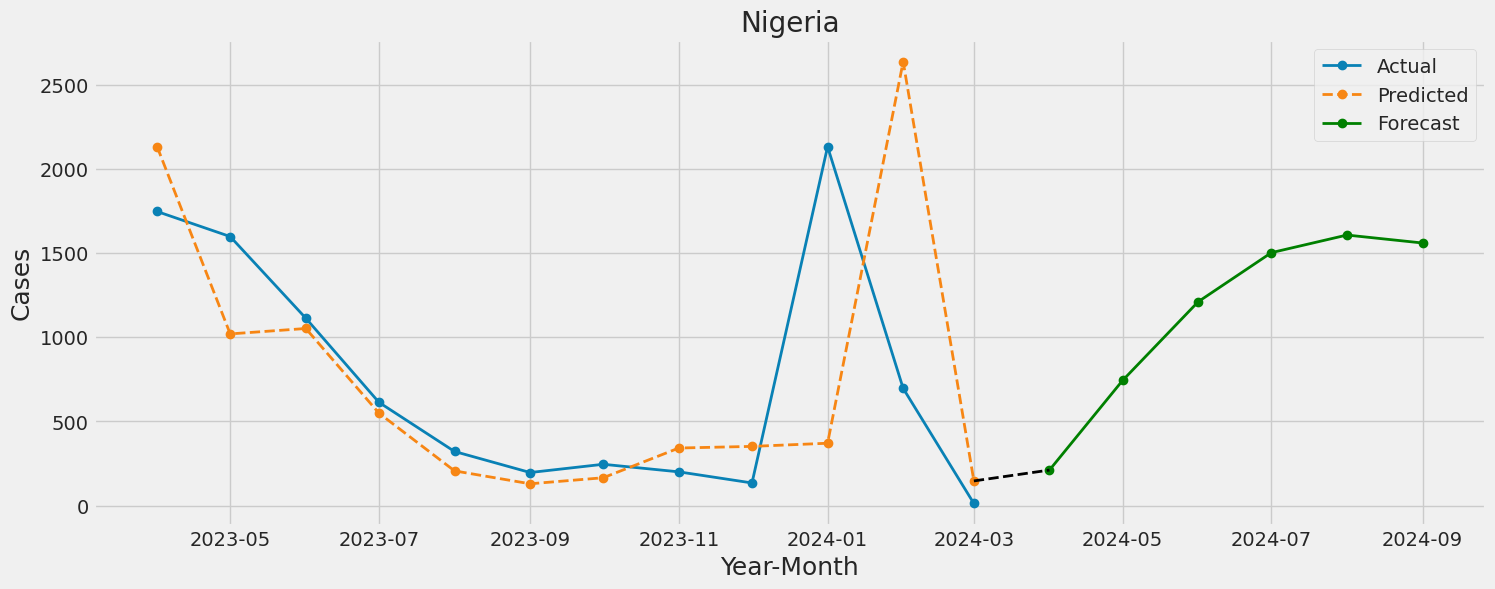

In [ ]:
# Plot the data
forecasting = asd
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Nigeria')
plt.xlabel('Year-Month', fontsize=18)
plt.ylabel('Cases', fontsize=18)
plt.plot(valid['Cases'], color='#0981b5', marker='o',linewidth=2)  # Actual cases
plt.plot(valid['Predictions'], color='#f78614',marker='o', linestyle='--',linewidth=2)  # Predicted cases (dashed line)
plt.plot(forecasting, marker='o', color='green',linewidth=2)  # Forecasted cases
plt.plot([valid.index[-1], forecasting.index[0]], [valid['Predictions'].iloc[-1], forecasting.iloc[0]], 'k--',linewidth=2)  # Dashed line connecting predicted and forecast
plt.legend(['Actual', 'Predicted', 'Forecast'], loc='upper right')
plt.show()